In [55]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams

rcParams['font.size']=16

code below defines the shock paramters for a red light

In [56]:
def density_red_light(nx, density_max, density_in):
    density = density_max*numpy.ones(nx)
    density[:(nx-1)*3/4] = density_in
    return density

In [57]:
#initial paramters and conditions

nx=81
nt=30
dx=4.0/(nx-1)

density_in=5
density_max=10

speed_max=1

x=numpy.linspace(0,4,nx)

DENSITY = density_red_light(nx,density_max,density_in)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


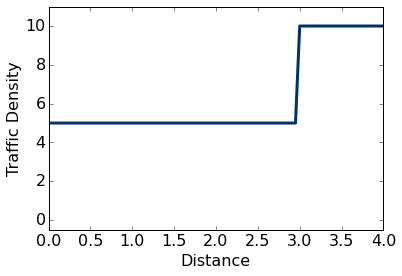

In [58]:
pyplot.plot(x, DENSITY, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic Density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 11);

note that the wave travels to the left. 
now we define some other useful functions

In [59]:
def Calculate_Flux(speed_max, density_max, DENSITY):
    
    return speed_max*DENSITY*(1-DENSITY/density_max)

In [60]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


In [61]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line

This next section focuses on the Lax-Friedrichs scheme

In [62]:
def laxfriedrichs(DENSITY, nt, dt, dx, density_max, speed_max):
    
    density_n = numpy.zeros((nt, len(DENSITY)))
    
    density_n[:,:]=DENSITY.copy()
    
    for t in range(1, nt):
        Flux = Calculate_Flux(speed_max, density_max, DENSITY)
        density_n[t,1:-1]=0.5*(DENSITY[2:]+DENSITY[:-2])-dt/(2*dx)*(Flux[2:]-Flux[:-2])
        density_n[t,0]=DENSITY[0] #Boundary condition at x=0
        density_n[t:-1]=DENSITY[-1] #boundary condition at x=4
        DENSITY=density_n[t].copy()
        
    return density_n
        

def laxfriedrichs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = numpy.zeros((nt,len(rho)))      
    rho_n[:,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:-1] = .5*(rho[2:]+rho[:-2]) - dt/(2*dx)*(F[2:]-F[:-2])
        rho_n[t,0] = rho[0] # boundary condition at x=0
        rho_n[t,-1] = rho[-1] # boundary condition at x=4
        rho = rho_n[t].copy()
        
    return rho_n
    

CFL stability condition

In [63]:
sigma=1.0
dt=sigma*dx/speed_max

In [64]:
DENSITY = density_red_light(nx, density_max, density_in)

DENSITY_n = laxfriedrichs(DENSITY, nt, dt, dx, density_max, speed_max)

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [65]:
DENSITY_n.shape

(30, 81)


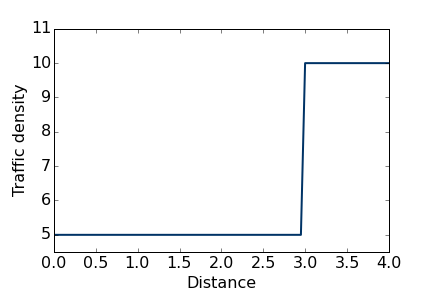
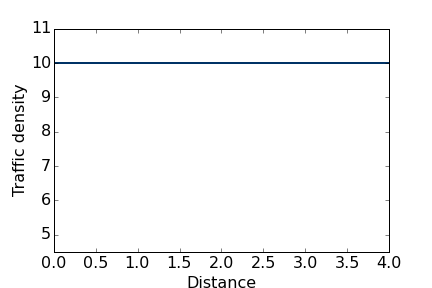
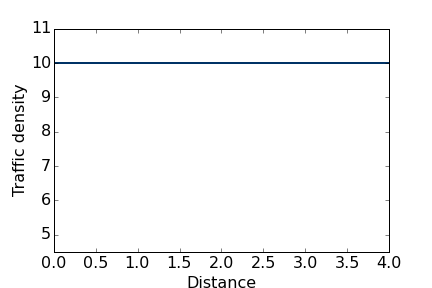
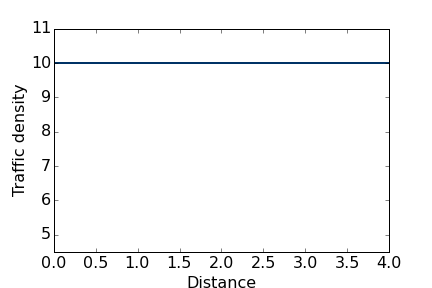
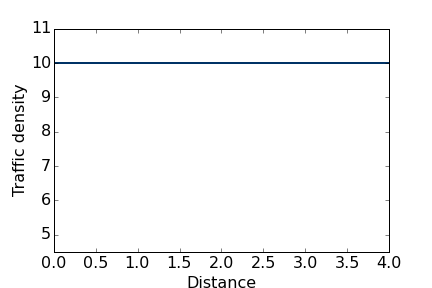
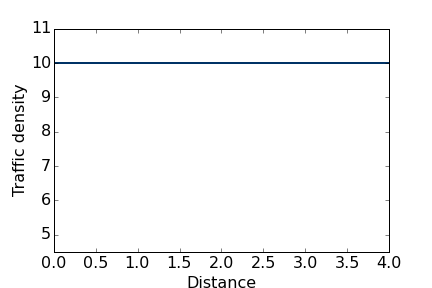
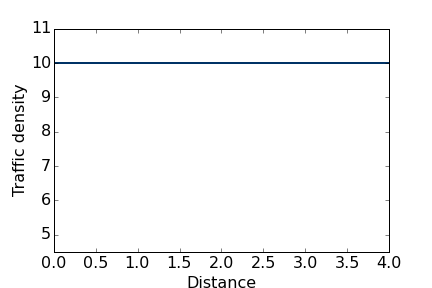
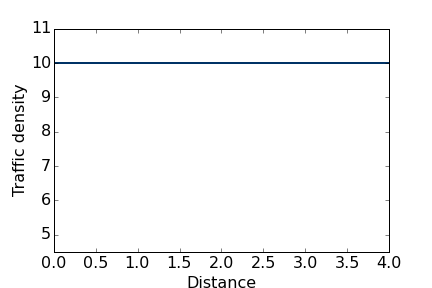
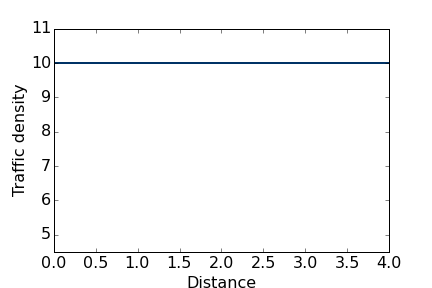
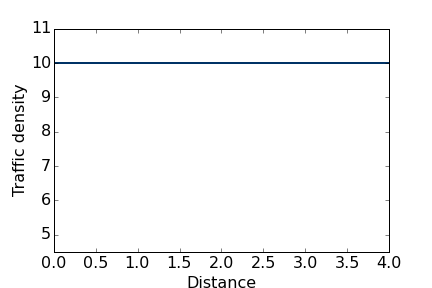
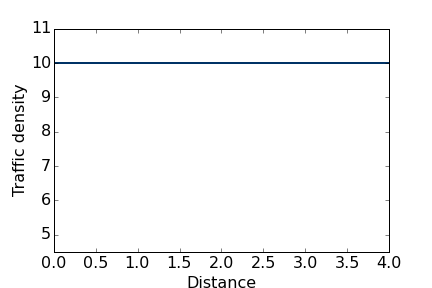
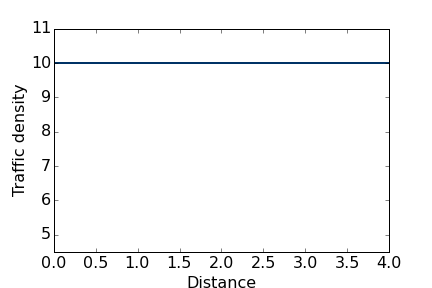
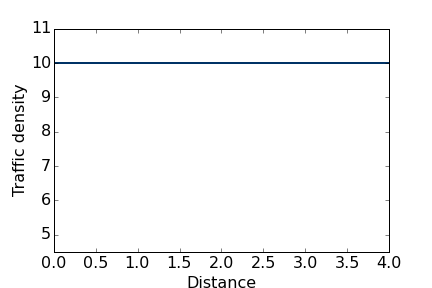
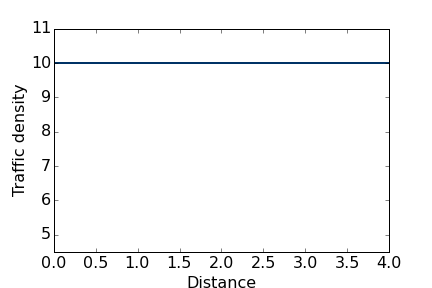
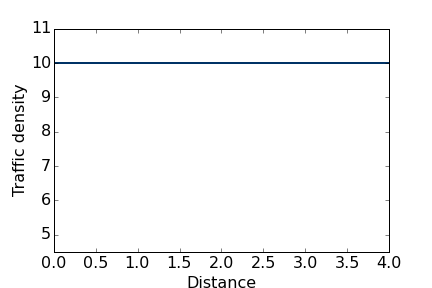
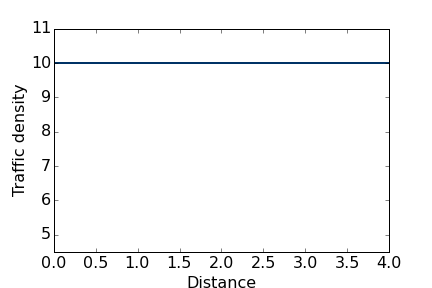
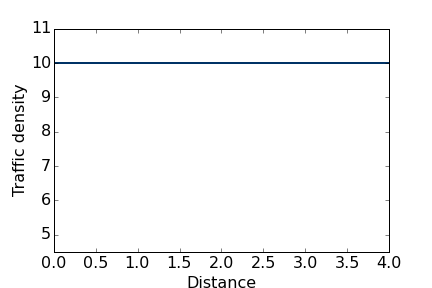
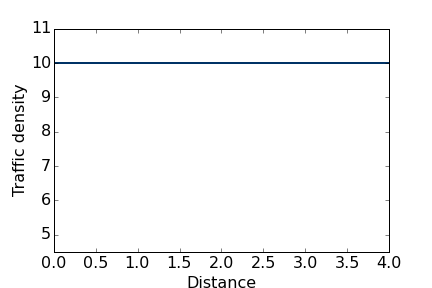
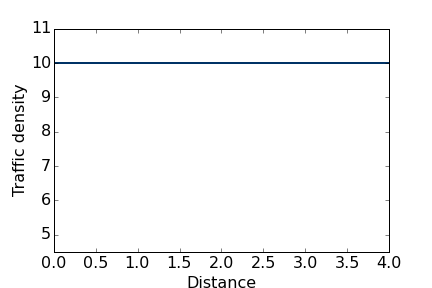
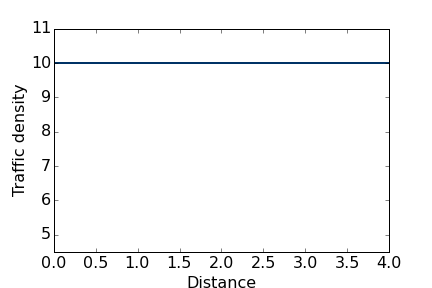
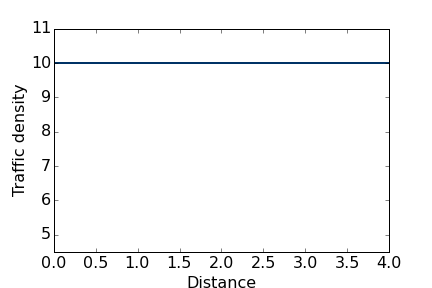
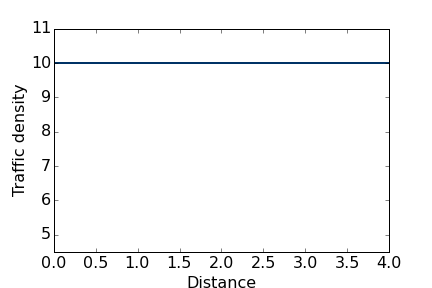
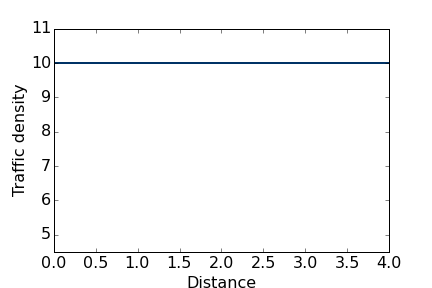
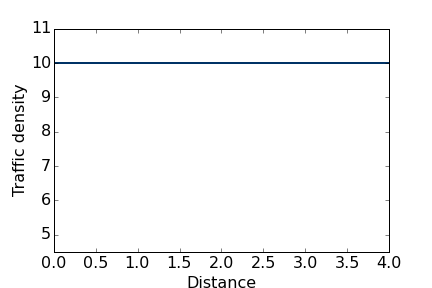
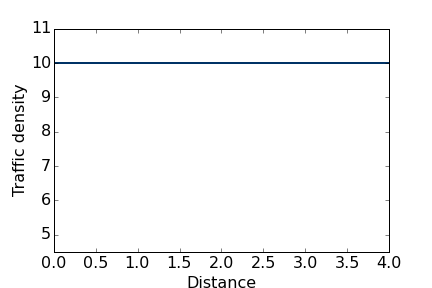
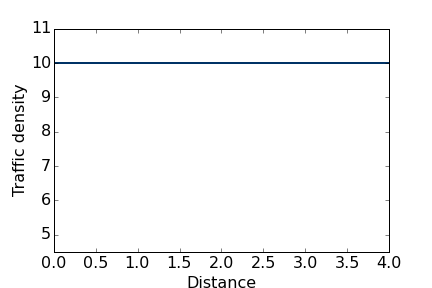
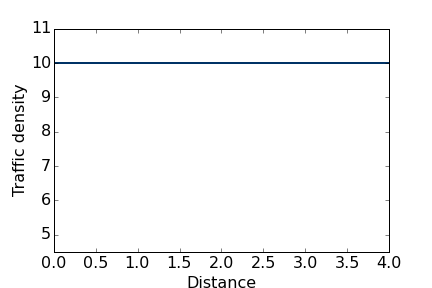
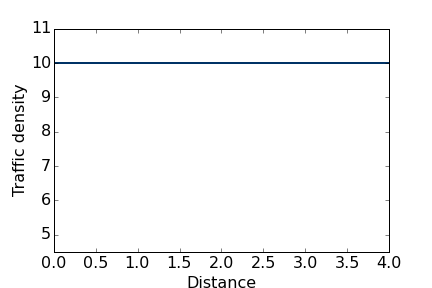
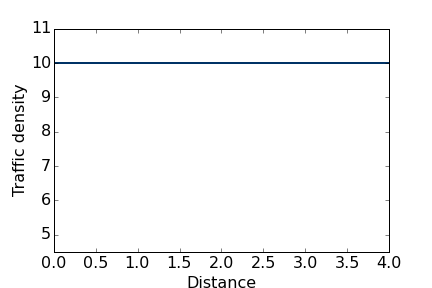
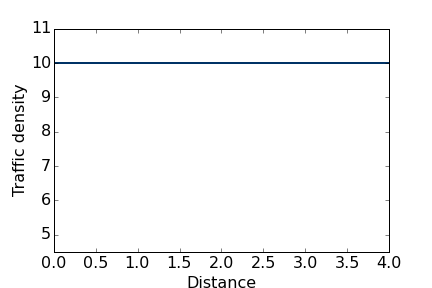

In [66]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(4.5,11),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=DENSITY_n, interval=50)
display_animation(anim, default_mode='once')